Use the provided file `Spotify_Playlist_Analysis.csv`.

Below, you can find all the set of features, provided in the dataset:


  1.   **Track Name:** The name of the track.
  
  2.   **Album Name:** The name of the album that the track belongs.

  3.   **Artist Name(s):** The name of the artists who released the track.

  4.   **Release Date:** The release date of the track.
  
  5.   **Duration (ms):** Numerical, the duration of the track in milliseconds.
  
  6.   **Popularity:** Numerical, the popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
  
  7.   **Genres:** The genres of the album that the track has.

  8.   **Danceability:** Numerical, danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

  9.   **Energy** Numerical, Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
  
  10.   **Key:** Numerical, the estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C#/Db, 2 = D, and so on. If no key was detected, the value is -1.
  
  11.   **Loudness:** Numerical, Overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
  
  12.   **Mode:** Numerical, mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
  
  13.   **Speechiness:**  Numerical, speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

  14.   **Acousticness:**  Numerical, Confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

  15.   **Instrumentalness** Numerical, predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
  
  16.   **Liveness:** Numerical, detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
  
  17.   **Valence:** Numerical, Measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
  
  18.   **Tempo:**  Numerical, Overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

It is not possible to find a perfect dataset. During data collection, some values can be lost or some values can be duplicated. These lost values are called as missing values. In the DataFrame, missing values are usually labelled as `NaN`. Before starting to work on our dataset, it is very important to clean the dataset. For this, we need to look at how many missing values we have in the data set, how many duplicates there are.

In this question;
* First, print the shape (Number of rows and columns) of the dataset.
* Secondly, you should show info of the dataset (#,column, non_null count, Dtype of columns) , this will also help to understand if dataframe has any missing values.
* Lastly, you should check if dataframe has any duplicates, and you should drop the duplicates if any.

In [ ]:
#read the file.
path = "/content/"
filename = "Spotify_Playlist_Analysis.csv"

df=pd.read_csv(path+filename)
#print number of the rows and columns.
print("Number of (rows and columns):",df.shape)

Number of (rows and columns): (607, 18)


In [ ]:
#show the info of the playlist_df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        607 non-null    object 
 1   Album Name        607 non-null    object 
 2   Artist Name(s)    607 non-null    object 
 3   Release Date      607 non-null    object 
 4   Duration (ms)     607 non-null    int64  
 5   Popularity        607 non-null    int64  
 6   Genres            603 non-null    object 
 7   Danceability      607 non-null    float64
 8   Energy            607 non-null    float64
 9   Key               607 non-null    int64  
 10  Loudness          607 non-null    float64
 11  Mode              607 non-null    int64  
 12  Speechiness       607 non-null    float64
 13  Acousticness      607 non-null    float64
 14  Instrumentalness  607 non-null    float64
 15  Liveness          607 non-null    float64
 16  Valence           607 non-null    float64
 1

When we control the result, number of non-null objects is equals to number of rows. This means there are no missing rows in our dataset, so don't need to do any operation here. Now let's filter the duplicate rows.

In [ ]:
#filter the duplicate rows and show the head.
duplicate = df[df.duplicated()]

duplicate.head()

,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
540,Simple Man,(Pronounced 'Leh-'Nérd 'Skin-'Nérd) [Expanded ...,Lynyrd Skynyrd,1973,357933,0,"album rock,blues rock,classic rock,country roc...",0.461,0.734,1,-9.379,1,0.0374,0.000790,0.005540,0.2200,0.423,120.550
541,Battle Symphony,One More Light,Linkin Park,2017-05-19,216281,62,"alternative metal,nu metal,post-grunge,rap metal",0.653,0.839,10,-5.077,1,0.0685,0.036900,0.000000,0.0680,0.669,149.034
542,we fell in love in october,we fell in love in october / forget her,girl in red,2018-11-21,184153,32,"bedroom pop,indie pop,norwegian indie,pop",0.566,0.366,7,-12.808,1,0.0280,0.113000,0.181000,0.1550,0.237,129.959
543,Moaning Lisa Smile,My Love Is Cool (Deluxe Edition),Wolf Alice,2016-02-05,160747,48,"indie pop,indie rock,modern alternative rock,m...",0.470,0.806,2,-2.920,1,0.0505,0.000575,0.056400,0.0917,0.339,98.046
544,zombie girl,songs,Adrianne Lenker,2020-10-23,164224,48,"art pop,chamber pop,indie folk,indie pop,indie...",0.538,0.103,8,-19.380,1,0.0462,0.914000,0.000053,0.1370,0.383,128.424


As you see above, there are some duplicate rows in our dataset. The duplicate values can be an issue in our analysis, so it's important to get rid of them. In below cell, first drop the duplicates then print the shape and see if the shape at the start changed or not.

In [ ]:
#drop the duplicates.
df = df.drop_duplicates()
#print number of the rows and columns after dropping duplicates.
print("Number of (rows and columns):",df.shape)

Number of (rows and columns): (594, 18)


Sometimes, you may fail to drop the duplicates. Double-check is important in these kind of cases therefore in the cell below, filter the duplicate rows again. If you see anything, then you did something wrong.

In [ ]:
#filter the duplicate rows.
duplicate2 = df[df.duplicated()]

print(duplicate2)

Empty DataFrame
Columns: [Track Name, Album Name, Artist Name(s), Release Date, Duration (ms), Popularity, Genres, Danceability, Energy, Key, Loudness, Mode, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo]
Index: []


## Exploring the Dataset

Since we complete the cleaning, we can finally start deep-diving into the dataset. First let's look at the 5 rows of our dataframe, and see the statistical summaries of columns with describe.

In [ ]:
#show the first 5 rows
df.head()

,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Crying Lightning,Humbug,Arctic Monkeys,2009-08-20,224826,67,"garage rock,modern rock,permanent wave,rock,sh...",0.498,0.885,4,-4.423,0,0.0461,0.0148,0.00041,0.239,0.670,106.719
1,Ode To The Mets,The New Abnormal,The Strokes,2020-04-10,351786,64,"alternative rock,garage rock,modern rock,perma...",0.426,0.617,1,-5.423,0,0.0289,0.3410,0.18100,0.101,0.201,92.002
2,Buzzcut Season,Pure Heroine,Lorde,2013-09-27,246755,68,"art pop,metropopolis,nz pop,pop",0.733,0.620,1,-10.525,1,0.0750,0.6060,0.30500,0.117,0.247,111.039
3,I Know The End,Punisher,Phoebe Bridgers,2020-06-18,344692,0,"indie pop,la indie",0.328,0.320,1,-10.282,1,0.0350,0.3240,0.01900,0.234,0.259,111.453
4,Simulation Swarm,Dragon New Warm Mountain I Believe In You,Big Thief,2022-02-11,252733,62,"art pop,brooklyn indie,indie pop,indie rock,sm...",0.703,0.578,1,-9.103,1,0.0728,0.4460,0.00240,0.102,0.670,105.204


In [ ]:
#show the statistical summary of columns.
df.describe()

,Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,242163.707071,47.897306,0.532816,0.609467,5.469697,-8.024519,0.675084,0.049382,0.251596,0.109972,0.170078,0.439241,124.301288
std,67305.655426,23.347754,0.147752,0.210018,3.496554,3.201484,0.468738,0.040821,0.296811,0.221824,0.126547,0.228532,27.708996
min,96553.000000,0.000000,0.112000,0.052300,0.000000,-23.625000,0.000000,0.024300,0.000007,0.000000,0.042600,0.039400,65.740000
25%,199164.250000,38.000000,0.429000,0.447250,2.000000,-9.511500,0.000000,0.031050,0.013650,0.000053,0.097675,0.253500,104.981000
50%,231626.500000,53.000000,0.535500,0.630500,6.000000,-7.595000,1.000000,0.037600,0.111000,0.002225,0.118000,0.416000,123.166000
75%,275446.250000,64.000000,0.644000,0.788750,9.000000,-5.644500,1.000000,0.052300,0.410750,0.076550,0.205750,0.594000,141.366500
max,757440.000000,90.000000,0.888000,0.977000,11.000000,-0.734000,1.000000,0.464000,0.986000,0.954000,0.922000,0.979000,206.165000


In [ ]:
#show the most frequent 10 artists in the playlist.
(df['Artist Name(s)'].value_counts()).head(10)

Arctic Monkeys     48
Lorde              21
Nilüfer Yanya      20
Wolf Alice         18
Phoebe Bridgers    13
The Strokes        13
Big Thief          12
Alvvays            12
alt-J              12
girl in red        12
Name: Artist Name(s), dtype: int64

In [ ]:
#find the most frequent genre in the playlist.
df['Genres'] = df['Genres'].astype(str).str.split(',')
genres_df = df.explode('Genres')
genre_counts = genres_df['Genres'].value_counts()
#print the most frequent genre name, and how many time it occurs.
print("The most common genre is",genre_counts.index[0],"with", genre_counts.iloc[0],"times.")


The most common genre is rock with 235 times.


The most common genre is not surprising since Arctic Monkeys was at the top by far in our most frequent artist list. Our dataset contains lots of technical information about the music. Still, we can create different columns for better information source. In this question, we will apply a pretty basic feature engineering approach. Danceability, Energy and Valence are good indicators for the emotion that conveyed by the track. Create a new column called "Positivity" in our dataframe by taking the mean of three columns (Danceability, Energy, Valence) and show the statistical properties with describe again.

In [ ]:
#create a new column
df["Positivity"] = df[["Danceability", "Energy", "Valence"]].mean(axis=1)
df.to_csv("updated_file.csv", index=False)
#show the statistical properties
df.describe()

,Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Positivity
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,242163.707071,47.897306,0.532816,0.609467,5.469697,-8.024519,0.675084,0.049382,0.251596,0.109972,0.170078,0.439241,124.301288,0.527175
std,67305.655426,23.347754,0.147752,0.210018,3.496554,3.201484,0.468738,0.040821,0.296811,0.221824,0.126547,0.228532,27.708996,0.141960
min,96553.000000,0.000000,0.112000,0.052300,0.000000,-23.625000,0.000000,0.024300,0.000007,0.000000,0.042600,0.039400,65.740000,0.164767
25%,199164.250000,38.000000,0.429000,0.447250,2.000000,-9.511500,0.000000,0.031050,0.013650,0.000053,0.097675,0.253500,104.981000,0.423750
50%,231626.500000,53.000000,0.535500,0.630500,6.000000,-7.595000,1.000000,0.037600,0.111000,0.002225,0.118000,0.416000,123.166000,0.538667
75%,275446.250000,64.000000,0.644000,0.788750,9.000000,-5.644500,1.000000,0.052300,0.410750,0.076550,0.205750,0.594000,141.366500,0.622333
max,757440.000000,90.000000,0.888000,0.977000,11.000000,-0.734000,1.000000,0.464000,0.986000,0.954000,0.922000,0.979000,206.165000,0.892667


In [ ]:
#filter the crying lightning
filtered_light = df[df['Track Name'] == 'Crying Lightning']
print(filtered_light)

         Track Name Album Name  Artist Name(s) Release Date  Duration (ms)  \
0  Crying Lightning     Humbug  Arctic Monkeys   2009-08-20         224826   

   Popularity                                             Genres  \
0          67  [garage rock, modern rock, permanent wave, roc...   

   Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
0         0.498   0.885    4    -4.423     0       0.0461        0.0148   

   Instrumentalness  Liveness  Valence    Tempo  Positivity  
0           0.00041     0.239     0.67  106.719    0.684333  


After we filtered Crying Lightning, let's learn more about some columns of the dataset. In this question, create a new dataframe called "energetic_df" by sorting the energy column of "playlist_df". Sorting must be descending. Then show the most energetic three songs in the playlist with their information.

In [ ]:
#create energetic df
print("The most energetic three songs in the playlist is:")
energetic_df = df.sort_values('Energy', ascending=False)
print(energetic_df.head(3)[['Track Name', 'Album Name', 'Artist Name(s)', 'Release Date', 'Duration (ms)', 'Popularity', 'Genres', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Positivity']])


The most energetic three songs in the playlist is:
     Track Name                   Album Name         Artist Name(s)  \
234   Sugar/Tzu                     Hellfire             black midi   
188  Brianstorm    Favourite Worst Nightmare         Arctic Monkeys   
326  By the Way  By the Way (Deluxe Edition)  Red Hot Chili Peppers   

    Release Date  Duration (ms)  Popularity  \
234   2022-07-15         230687          48   
188   2007-04-22         172866          68   
326   2002-07-09         216933          72   

                                                Genres  Danceability  Energy  \
234  [crank wave, indie rock, noise rock, uk noise ...         0.275   0.977   
188  [garage rock, modern rock, permanent wave, roc...         0.420   0.974   
326  [alternative rock, funk metal, funk rock, perm...         0.451   0.970   

     Key  Loudness  Mode  Speechiness  Acousticness  Instrumentalness  \
234    0    -4.418     1        0.378      0.105000          0.000011   
188    1

Let's apply the same method to an another column. In this question, create a new dataframe called "positivity_df" by sorting the positivity column of "playlist_df". Sorting must be descending. Then show the most positive three songs in the playlist with their information.

In [ ]:
#create positivity df
print("The most positive three songs in the playlist is:")
#your code
positivity_df = df.sort_values('Positivity', ascending=False)
print(positivity_df.head(3)[['Track Name', 'Album Name', 'Artist Name(s)', 'Release Date', 'Duration (ms)', 'Popularity', 'Genres', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Positivity']])


The most positive three songs in the playlist is:
                                   Track Name  \
559                                  chase me   
255                                 Ocean Man   
536  Got My Mind Set On You - Remastered 2004   

                                            Album Name   Artist Name(s)  \
559                                           PAINLESS    Nilüfer Yanya   
255  The SpongeBob SquarePants Movie-Music From The...             Ween   
536                                         Cloud Nine  George Harrison   

    Release Date  Duration (ms)  Popularity  \
559   2022-03-04         210373          31   
255   2004-11-09         126946          38   
536   1987-11-02         234653          63   

                                                Genres  Danceability  Energy  \
559          [art pop, indie rock, uk alternative pop]         0.867   0.832   
255                                 [alternative rock]         0.720   0.912   
536  [album rock, beatl

## Visualization and Analysis

We learned many things about our dataset. Now let's create some visualizations using tools like Matplotlib, Seaborn etc.

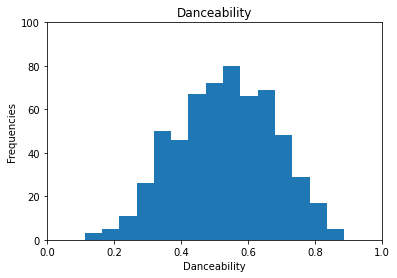

In [ ]:
# create a histogram with the information above
bin_size = 15
plt.hist(df['Danceability'], bins = bin_size)
plt.title('Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequencies')
plt.xlim(0, 1)
plt.ylim(0, 100)

plt.show()


In [ ]:
#show the statistical properties
print(df['Danceability'].describe())

count    594.000000
mean       0.532816
std        0.147752
min        0.112000
25%        0.429000
50%        0.535500
75%        0.644000
max        0.888000
Name: Danceability, dtype: float64


If we analyze the results, we see that the distribution of the 'Danceability' of the tracks in our data set is close to normal distribution. The mean is 0.532816 with a standard deviation 0.147752. The danceability level vary from 0.112000 to 0.888000 (both inclusive). The median is 0.535500.

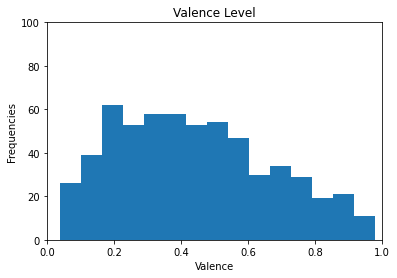

In [ ]:
# create a histogram with the information above
plt.hist(df['Valence'], bins=15)
plt.title('Valence Level')
plt.xlabel('Valence')
plt.ylabel('Frequencies')
plt.ylim([0, 100])
plt.xlim([0, 1])

plt.show()

In [ ]:
#show the statistical properties
print(df['Valence'].describe())

count    594.000000
mean       0.439241
std        0.228532
min        0.039400
25%        0.253500
50%        0.416000
75%        0.594000
max        0.979000
Name: Valence, dtype: float64


If we analyze the results, we see that the distribution of the 'Valence' of the tracks in our data set is right-skewed. The mean is 0.439241 with a standard deviation 0.0.228532. The valence level vary from 0.039400 to 0.979000 (both inclusive). The median is 0.416000.

Now let's do some bi-variate analysis.

If we want to plot the relationship between Energy and Loudness, which plot would be the appropriate choice?

*Answer* : I would prefer scatter plot because it would show exactly how they are related like "If Loudness increases, does Energy is also increase?". Basically, what I mean is we will be able to see correlation between loudness and energy. So, scatter plot will help us to comment on data we have by visualizing easily.

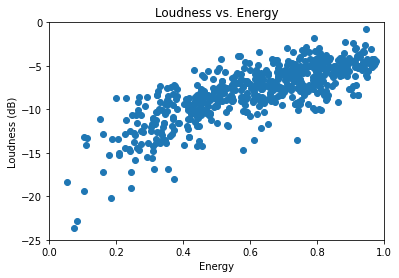

In [ ]:
 # create the plot

plt.scatter(df['Energy'], df['Loudness'])
plt.title('Loudness vs. Energy')
plt.xlabel('Energy')
plt.ylabel('Loudness (dB)')
plt.ylim(-25, 0)
plt.xlim(0, 1)

plt.show()

#### Question : Interpretation of the graph above


We can clearly say that Loudness and Energy has positive correlation between them. As the loudness of music increases, energy of the music will increase as well. Also, increase in energy might be the reason about loudness as well. Data shows us like that.
In addition, for the part 0 to 0.2 energy; we do not see many data. However, it appears that some of the music with lower decibal results the increase in energy as well.

In [ ]:
df.loc[df['Positivity'] <= 0.45, 'Emotion'] = 'Sad'
df.loc[(df['Positivity'] > 0.45) & (df['Positivity'] <= 0.57), 'Emotion'] = 'Neutral'
df.loc[df['Positivity'] > 0.57, 'Emotion'] = 'Happy'

new_artist_df = df[df['Artist Name(s)'].isin(['Phoebe Bridgers', 'The Strokes', 'alt-J', 'girl in red'])].sort_values(by=['Positivity'], ascending = True)

print(new_artist_df.head(5))

         Track Name            Album Name   Artist Name(s) Release Date  \
193   Smoke Signals  Stranger in the Alps  Phoebe Bridgers   2017-09-22   
267         Funeral  Stranger in the Alps  Phoebe Bridgers   2017-09-22   
349       Moon Song              Punisher  Phoebe Bridgers   2020-06-18   
329        Punisher              Punisher  Phoebe Bridgers   2020-06-18   
295  I Know The End              Punisher  Phoebe Bridgers   2020-06-18   

     Duration (ms)  Popularity                 Genres  Danceability  Energy  \
193         324773          61  [indie pop, la indie]         0.265   0.237   
267         232373          65  [indie pop, la indie]         0.218   0.263   
349         277676           0  [indie pop, la indie]         0.380   0.240   
329         189622           0  [indie pop, la indie]         0.428   0.226   
295         344692          70  [indie pop, la indie]         0.323   0.323   

     Key  Loudness  Mode  Speechiness  Acousticness  Instrumentalness  \
1

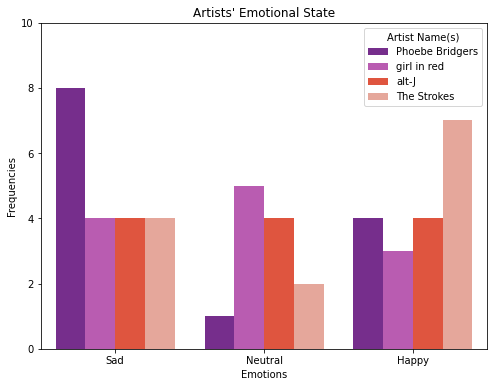

In [ ]:
count = new_artist_df.groupby(['Artist Name(s)', 'Emotion']).size().reset_index(name='Frequency')
plt.figure(figsize=(8,6))
sns.barplot(
    hue = 'Artist Name(s)', hue_order = ['Phoebe Bridgers', 'girl in red', 'alt-J', 'The Strokes'],
    order = ['Sad', 'Neutral', 'Happy'],
    x = 'Emotion',y = 'Frequency',
    data = count,
    palette = ['#7e1e9c', '#c94cbe', '#fa4224', '#f29e8e']

)
plt.title("Artists' Emotional State")
plt.xlabel('Emotions')
plt.ylabel('Frequencies')
plt.ylim([0, 10])

plt.show()

**If you want to listen to the playlist we analyzed:**
https://open.spotify.com/playlist/5TPzjEydJcgbNj7xLwKQVG?si=669fdd7512c44d96

See you later!
    
<img src="https://i.imgur.com/KAoQCQg.png" alt="barplot-210" border="0" width="300">

***dall-e prompt***: an oil painting of data science student does homework in pain

